# Influence of different parameters on our DQN


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style="darkgrid")

In [36]:
num_setups = 5 # highest among the first number in the file name
num_runs = 7 # how many times we repeat the same setup
mean_window = 20
env = 'Acrovot-v1' # which env we use

In [37]:
#make some inteligent loop to iterate over all runs of one setting

my_experiment = pd.read_json('LOG.episode_batch.3_Acrobot-v1_AB_75-50-25_2017-06-19-06-53_0.stats.json', orient='columns')
my_experiment


,episode_lengths,episode_rewards,episode_types,initial_reset_timestamp,mean_episode_lengths,mean_episode_rewards,mean_window_size,timestamps
0,1761,-1730,t,1.497853e+09,1761.000000,-1730.000000,100,2017-06-19 06:21:07.763389000
1,1740,-1709,t,1.497853e+09,1750.500000,-1719.500000,100,2017-06-19 06:21:09.291066000
2,1274,-1243,t,1.497853e+09,1591.666667,-1560.666667,100,2017-06-19 06:21:10.684644000
3,469,-438,t,1.497853e+09,1311.000000,-1280.000000,100,2017-06-19 06:21:11.164542000
4,2228,-2197,t,1.497853e+09,1494.400000,-1463.400000,100,2017-06-19 06:21:12.637291000
5,648,-617,t,1.497853e+09,1353.333333,-1322.333333,100,2017-06-19 06:21:13.004736000
6,1590,-1559,t,1.497853e+09,1387.142857,-1356.142857,100,2017-06-19 06:21:13.885699000
7,565,-534,t,1.497853e+09,1284.375000,-1253.375000,100,2017-06-19 06:21:14.197742000
8,1607,-1576,t,1.497853e+09,1320.222222,-1289.222222,100,2017-06-19 06:21:15.047498000
9,1287,-1256,t,1.497853e+09,1316.900000,-1285.900000,100,2017-06-19 06:21:15.722389000


In [38]:
rwd = np.array(my_experiment['episode_rewards'].T)
stp = np.array(my_experiment['episode_lengths'].T)
avg_rwd = np.array(my_experiment['mean_episode_rewards'].T)
avg_stp = np.array(my_experiment['mean_episode_lengths'].T)
#calculate exploartionrate
explo_rate = np.zeros(len(rwd))
#add correct formula here
for i in range(len(rwd)):
    # since we habe a linear Schedule for 30 Iterations, assume each episode has 5000steps
    if (i>30):
        explo_rate[i] = 0.1
    else:
        explo_rate[i]= 1 + (i*5000)*(-0.9)/150000
print(explo_rate)

[ 1.    0.97  0.94 ...,  0.1   0.1   0.1 ]


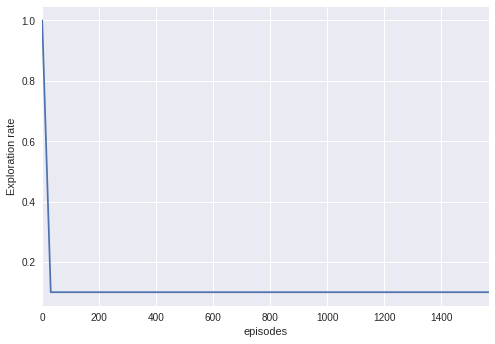

In [39]:
sns.tsplot(data=explo_rate)
plt.ylabel('Exploration rate')
plt.xlabel('episodes')

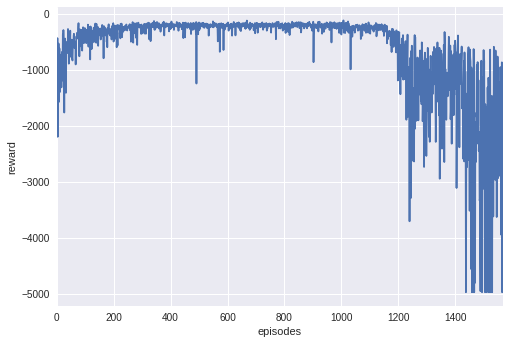

In [40]:
sns.tsplot(data=rwd) #plot reward rwd and explo_rate in ein diagramm wenn moeglich
plt.ylabel('reward')
plt.xlabel('episodes')


In [41]:

f, axes = plt.subplots(nrows=1, 3, figsize=(20,5))
axes = [axes]
for setup in range(num_setups):
    for exp, (name, data) in enumerate(experiments):
        sns.tsplot(data=data[setup,:,:], color=colors[setup], ax=axes[0][exp], value=name)
plt.show()


SyntaxError: positional argument follows keyword argument (<ipython-input-41-c271dfd34369>, line 2)

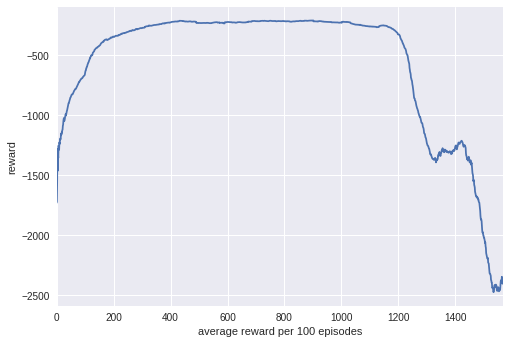

In [42]:
sns.tsplot(data=avg_rwd)
plt.ylabel('reward')
plt.xlabel('average reward per 100 episodes')

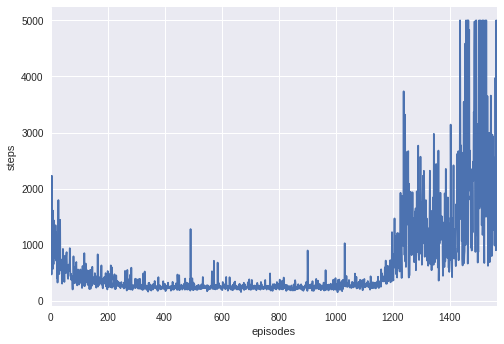

In [43]:
sns.tsplot(data=stp)
plt.ylabel('steps')
plt.xlabel('episodes')

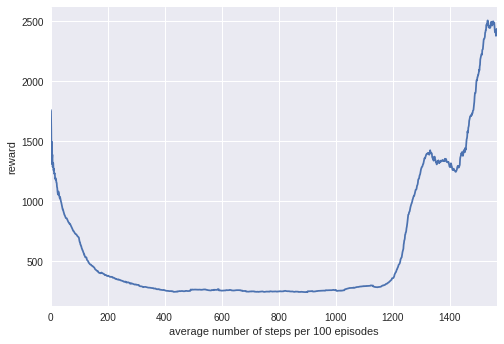

In [44]:
sns.tsplot(data=avg_stp)
plt.ylabel('reward')
plt.xlabel('average number of steps per 100 episodes')